In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Train Data

In [3]:
df=pd.read_excel(r'C:\Users\Hendri\Udemy\Heroku\Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Automated EDA

In [5]:
import pandas_profiling as pf

In [6]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Manual EDA

In [7]:
df.shape

(10683, 11)

In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering

In [11]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


### Parsing Date_of_Journey

In [12]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [13]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [14]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


### Parsing Dep_Time

In [15]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Dep_hr']=(df['Dep_Time']).dt.hour
df['Dep_min']=(df['Dep_Time']).dt.minute

In [16]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [17]:
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


### Parsing Arrival_Time

In [18]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df['Arrival_hr']=(df['Arrival_Time']).dt.hour
df['Arrival_min']=(df['Arrival_Time']).dt.minute

In [19]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


### Duration Time

In [21]:
duration = df['Duration'].str.split(' ',expand=True)
duration[1].fillna('00m',inplace=True)
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #remove h
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #remove m

In [22]:
df.drop(['Duration'],axis=1,inplace=True)

In [23]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


### Count of Airlines

In [24]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Airline vs Price

<AxesSubplot:ylabel='Airline'>

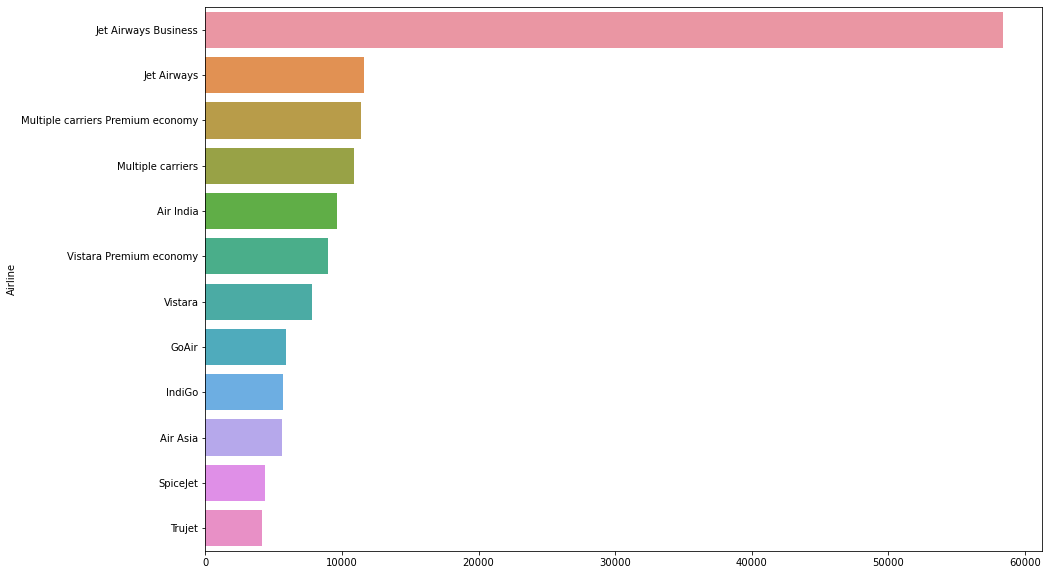

In [25]:
Airprices = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.values,Airprices.index)

**Jet Airways Business has the highest prices with Trujet having the lowest**

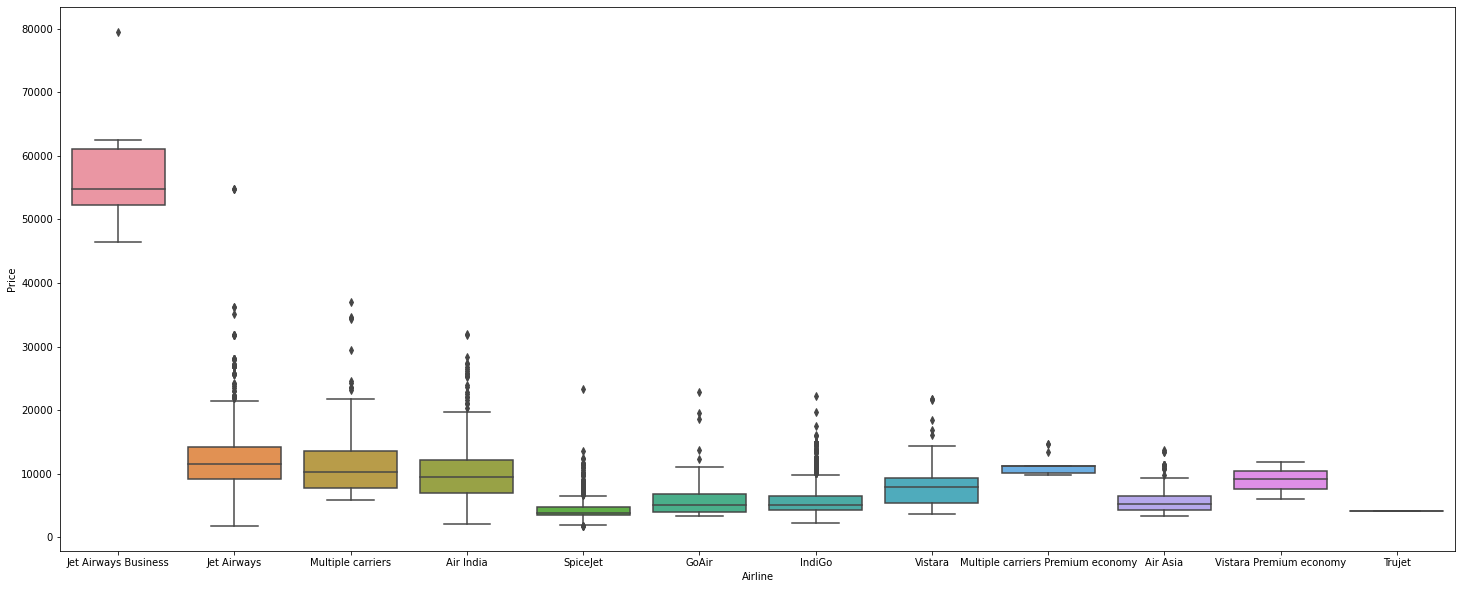

In [26]:
plt.figure(figsize=(25,10))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))
plt.show()

### Price based on number of stops

In [27]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

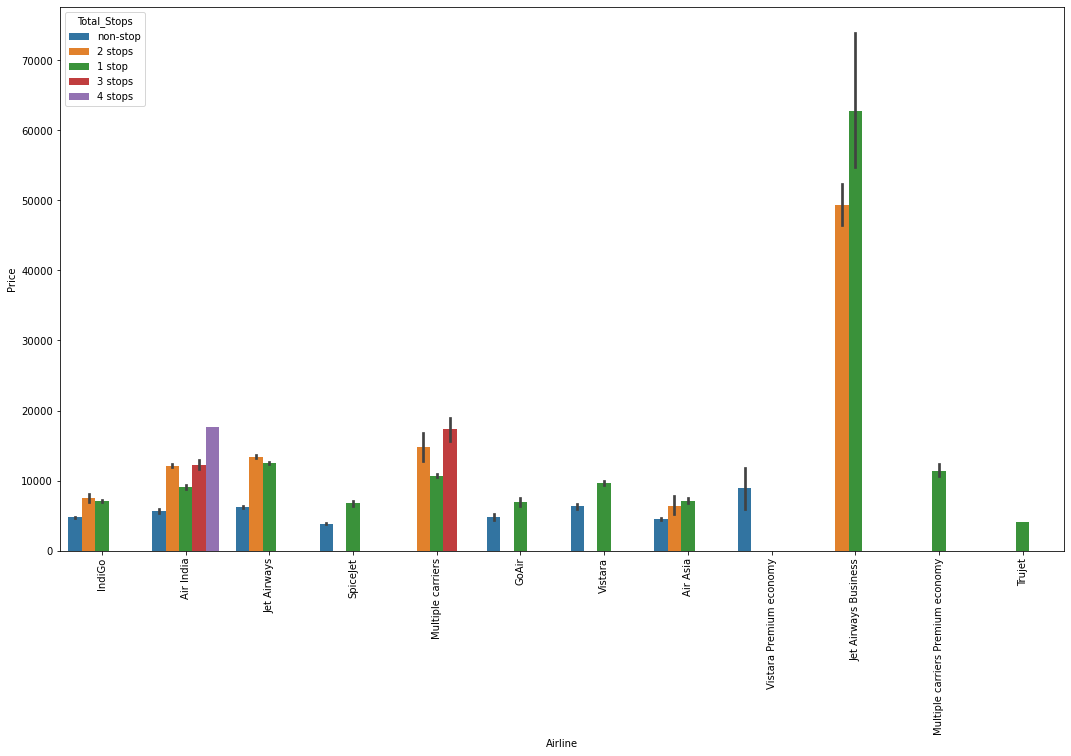

In [28]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**One stop and two stops Jet Airways Business is having the highest price**

In [29]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Source vs Price

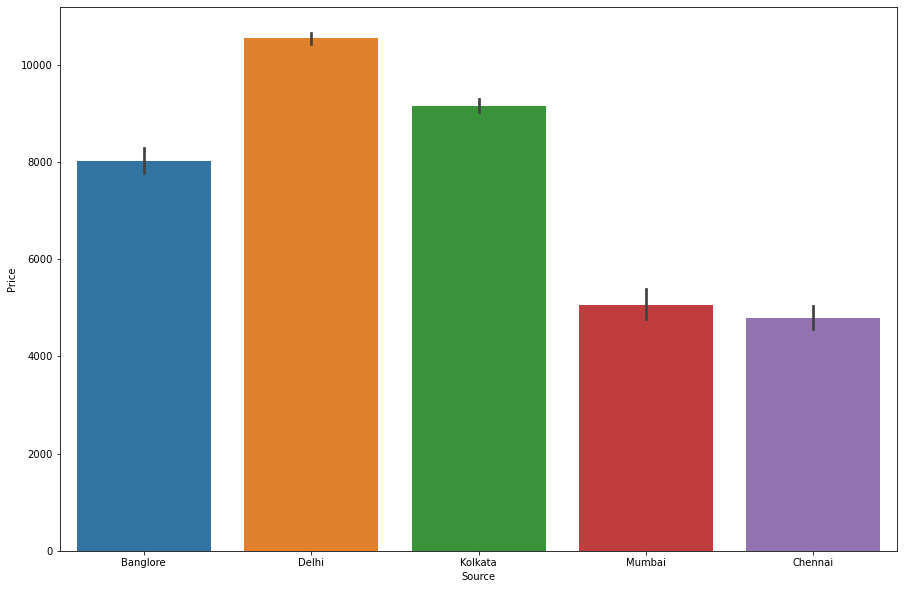

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

### Destination vs Price

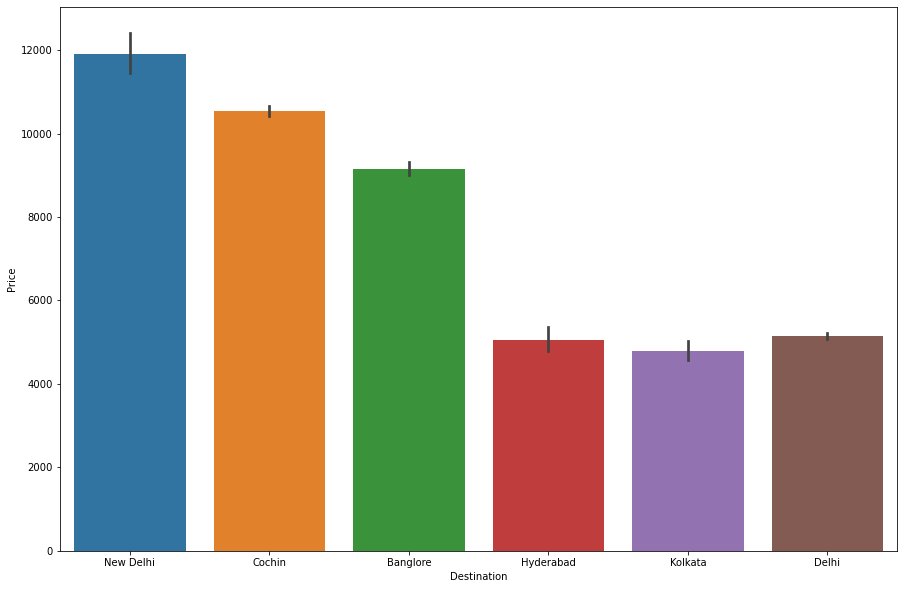

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [32]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [34]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

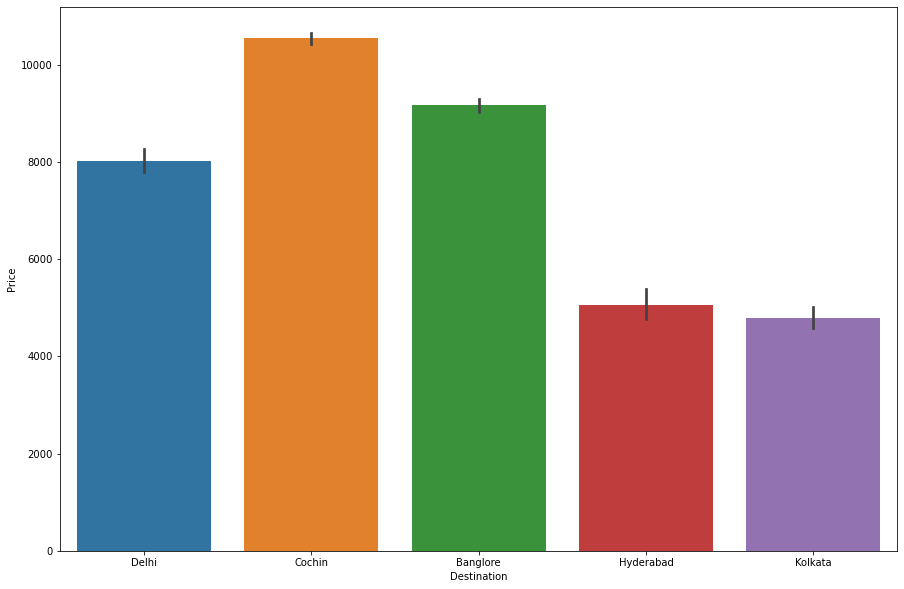

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

### Apply One Hot Encoding on the categorical value

In [36]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

air_dummy=pd.get_dummies(df['Airline'],drop_first=True)

source_test_dummy = pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_test_dummy,df],axis=1)

In [38]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [39]:
df.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Air India                          10682 non-null  uint8 
 1   GoAir                              10682 non-null  uint8 
 2   IndiGo                             10682 non-null  uint8 
 3   Jet Airways                        10682 non-null  uint8 
 4   Jet Airways Business               10682 non-null  uint8 
 5   Multiple carriers                  10682 non-null  uint8 
 6   Multiple carriers Premium economy  10682 non-null  uint8 
 7   SpiceJet                           10682 non-null  uint8 
 8   Trujet                             10682 non-null  uint8 
 9   Vistara                            10682 non-null  uint8 
 10  Vistara Premium economy            10682 non-null  uint8 
 11  Source_Chennai                     10682 non-null  uint8 
 12  Sour

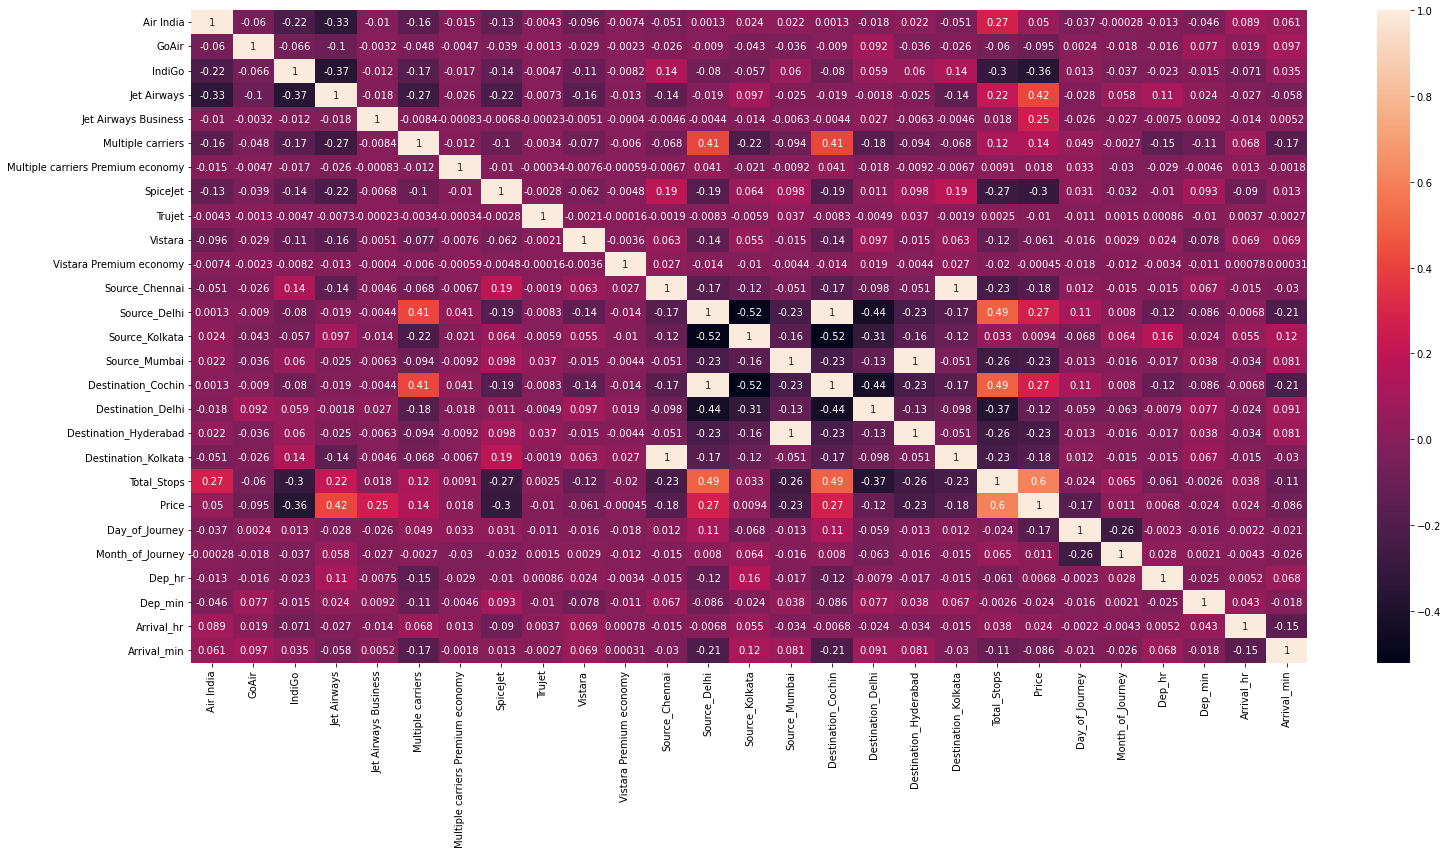

In [41]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

The features are less correlated which is a good thing to avoid **Multicollinearity**.

# Test Data

In [42]:
df_test = pd.read_excel(r'C:\Users\Hendri\Udemy\Heroku\Test_set.xlsx')

In [43]:
df_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
for i in df_test: #replacing New Delhi to Delhi
    df_test.replace('New Delhi','Delhi',inplace=True)

In [45]:
df_test['Total_Stops']=df_test['Total_Stops'].map({'non_stop':0, '1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)

source_test_dummy = pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_test_dummy,df_test],axis=1)

In [46]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

df_test['Dep_Time']=pd.to_datetime(df_test['Dep_Time'])
df_test['Dep_hr']=(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=(df_test['Dep_Time']).dt.minute

df_test['Arrival_Time']=pd.to_datetime(df_test['Arrival_Time'])
df_test['Arrival_hr']=(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=(df_test['Arrival_Time']).dt.minute

In [47]:
df_test.drop(['Airline','Source','Destination','Additional_Info','Route','Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [48]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 26)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Air India                          10682 non-null  uint8 
 1   GoAir                              10682 non-null  uint8 
 2   IndiGo                             10682 non-null  uint8 
 3   Jet Airways                        10682 non-null  uint8 
 4   Jet Airways Business               10682 non-null  uint8 
 5   Multiple carriers                  10682 non-null  uint8 
 6   Multiple carriers Premium economy  10682 non-null  uint8 
 7   SpiceJet                           10682 non-null  uint8 
 8   Trujet                             10682 non-null  uint8 
 9   Vistara                            10682 non-null  uint8 
 10  Vistara Premium economy            10682 non-null  uint8 
 11  Source_Chennai                     10682 non-null  uint8 
 12  Sour

In [50]:
x=df.drop(['Route','Price','Additional_Info'],axis=1)
y=df['Price']

In [51]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


## Model Building and Hyperparameter Tuning

### ExtraTreesRegressor

In [52]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [53]:
#preparing model
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators=120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7713963552870375

In [54]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)

r2_score(y_test,y_predict)

0.7910309947980756

### Hyperparameter

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=80,stop=1500,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(6,45,num=5)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

#random grid

rand_grid = {'n_estimators' : n_estimators,
             'max_features' : max_features,
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'min_samples_leaf' : min_samples_leaf}

rf = RandomForestRegressor()

rCV = RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42,n_jobs=1)

In [57]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [58]:
rf_pred = rCV.predict(X_test)
rf_pred

array([12542.72243978,  4284.65355809,  6130.04719068, ...,
       11642.68216549,  9708.09017655,  8656.92681793])

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.0313100810924
MSE 3948200.055601044


In [60]:
r2_score(y_test,rf_pred)

0.8077207332467644

In [62]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 132ms	remaining: 2m 11s
1:	learn: 4317.7245126	total: 134ms	remaining: 1m 6s
2:	learn: 4167.9871081	total: 135ms	remaining: 45s
3:	learn: 4030.4839609	total: 138ms	remaining: 34.3s
4:	learn: 3906.4844760	total: 140ms	remaining: 27.8s
5:	learn: 3785.4580402	total: 141ms	remaining: 23.4s
6:	learn: 3673.8662552	total: 143ms	remaining: 20.2s
7:	learn: 3582.0533069	total: 145ms	remaining: 18s
8:	learn: 3495.5629367	total: 147ms	remaining: 16.1s
9:	learn: 3404.7478335	total: 148ms	remaining: 14.7s
10:	learn: 3325.1004431	total: 150ms	remaining: 13.5s
11:	learn: 3254.1004651	total: 151ms	remaining: 12.5s
12:	learn: 3184.6084064	total: 153ms	remaining: 11.6s
13:	learn: 3122.3064005	total: 156ms	remaining: 11s
14:	learn: 3067.6550706	total: 157ms	remaining: 10.3s
15:	learn: 3014.5169632	total: 161ms	remaining: 9.88s
16:	learn: 2962.4252595	total: 162ms	remaining: 9.37s
17:	learn: 2920.1931240	total: 164ms	remaining: 8.93s
18:	learn: 28

In [63]:
cat_pred = cat.predict(X_test)

In [64]:
r2_score(y_test,cat_pred)

0.8273858089678572

In [66]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [67]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [68]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [70]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)

r2_score(y_test,xgb_pred)

0.8212496825906317

In [71]:
df.head(5)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [73]:
#save model

import pickle

pickle.dump(cat,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [74]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [75]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [76]:
deploy_df.to_csv('deploy_df')